In [48]:
from pathlib import Path
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn3
from matplotlib.pyplot import figure

import warnings
warnings.simplefilter('ignore')



In [49]:
df_path = "./DEU_with_candidates_15words.csv"
df = pd.read_csv(df_path)

list_cols = ['S-Capade Candidates', 'PySpell Candidates', 'Combined Candidates',
       'S-Capade Ranked', 'PySpell Ranked', 'Combined Ranked']

df = df[~df['Correction'].str.contains(" ")]


def convert_string_to_list(string):
    string = string[2:-2] # Remove brackets at either end
    new_list = string.split("', '")
    return new_list

for col in list_cols:
    df[col] = df[col].apply(convert_string_to_list)

df.head(5)

,Error,Correction,Masked Context,Phoneme Seq,S-Capade Candidates,PySpell Candidates,Combined Candidates,S-Capade Ranked,PySpell Ranked,Combined Ranked
0,educal,educational,not much connected with or related to people f...,EH JH AH K AH L,"[epochal, oedipal, ethical, educate, oracle, e...",[ducal],"[oracle, chuckle, etiquette, jekyll, epochal, ...","[ethical, educate, etiquette, edible, epochal,...",[ducal],"[ethical, educate, etiquette, edible, epochal,..."
2,scaple,scalpel,there is also a very high chance of infections...,S K EY P AH L,"[staple, scruple, stapler, scuffle, steeple, s...","[staple, scape, scale]","[spatial, stapler, scruple, scuffle, skittle, ...","[stapler, staple, steeple, stable, skittle, sp...","[staple, scale, scape]","[stapler, staple, steeple, stable, scale, skit..."
4,accomlishing,accomplishing,and technologies are rising steadily but you a...,AH K AA M L IH SH IH NG,"[accomplishing, abolishing, accomplishes]",[accomplishing],"[accomplishing, abolishing, accomplishes]","[accomplishing, accomplishes, abolishing]",[accomplishing],"[accomplishing, accomplishes, abolishing]"
6,scapel,scalpel,you an example let say a veterinarian performe...,S K AE P AH L,"[snapple, scrabble, scruple, scuffle, scalpel,...","[scalpel, scape, capel]","[scruple, scuffle, snapple, spackle, skittle, ...","[scalpel, skittle, staple, snapple, scruple, s...","[scalpel, scape, capel]","[scalpel, skittle, staple, snapple, scruple, s..."
7,communitie,communities,young people help for exsample orchestra they ...,K AH M Y UW N IH T IY,"[community, community, communities, immunity, ...",[communities],"[immunity, community, communities, communing, ...","[community, communities, communing, immunity, ...",[communities],"[community, communities, communing, immunity, ..."


## Is the correction appearing in S-Capade and PySpell candidate lists?


In [50]:
def plot_venn_diagram(sets, labels=[], set_labels=[], title=''):
    
    plt.figure(linewidth=5, facecolor='#F0F0F0', figsize=(15,12), dpi=60)
    
    
    if len(sets) == 2:
        v = venn2(sets, set_labels=set_labels)
        
    elif len(sets) == 3:
        v = venn3(sets, set_labels=set_labels)  
        
    else:
        print("'sets' should be a list contatain either 2 or three sets.")
        return
  
    plt.legend(labels=labels)
    plt.title(title)
    plt.show()

In [51]:
def generate_sets_from_bools(df):
    """ 
    Takes a DataFrame consisting of columns containing boolean values only.
    
    Returns a list of sets, where each set contains the indices where True
    occurs in a single column.
    
    """
    sets = []
    for col in df.columns:
        sets.append(set(df[df[col] == True].index))
    return sets

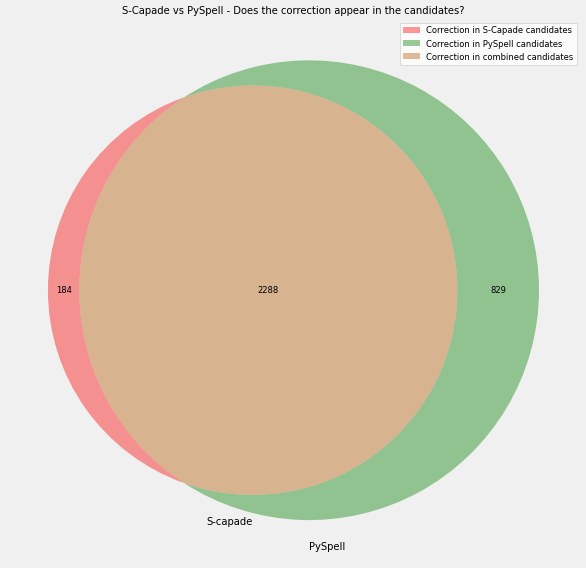

In [52]:
candidate_results_df = pd.DataFrame()

candidate_results_df["S-Capade"] =  df.apply(lambda x: x['Correction'] in x['S-Capade Candidates'], axis=1)
candidate_results_df["PySpell"] = df.apply(lambda x: x['Correction'] in x['PySpell Candidates'], axis=1)

sets = generate_sets_from_bools(candidate_results_df)

set_labels=['S-capade','PySpell']

labels=['Correction in S-Capade candidates',
        'Correction in PySpell candidates',
        'Correction in combined candidates']

title = 'S-Capade vs PySpell - Does the correction appear in the candidates?'

plot_venn_diagram(sets, set_labels=set_labels, labels=labels, title=title)

In [53]:
print(f"Total number of items in dataset: {len(candidate_results_df)}")
print()

print(f"Total correct predictions in S-Capade candidates: {candidate_results_df['S-Capade'].sum()}")
print(f"Percentage correct predictions in S-Capade candidates: {candidate_results_df['S-Capade'].sum() / len(candidate_results_df)}")
print()

print(f"Total correct predictions in PySpell candidates: {candidate_results_df['PySpell'].sum()}")
print(f"Percentage correct predictions in PySpell candidates: {candidate_results_df['PySpell'].sum() / len(candidate_results_df)}")
print()



Total number of items in dataset: 3567

Total correct predictions in S-Capade candidates: 2472
Percentage correct predictions in S-Capade candidates: 0.6930193439865433

Total correct predictions in PySpell candidates: 3117
Percentage correct predictions in PySpell candidates: 0.8738435660218671



# Were the rankings correct? 

##  S-Capade Only

In [54]:
def get_first_in_list(l):
    return l[0] if l else None

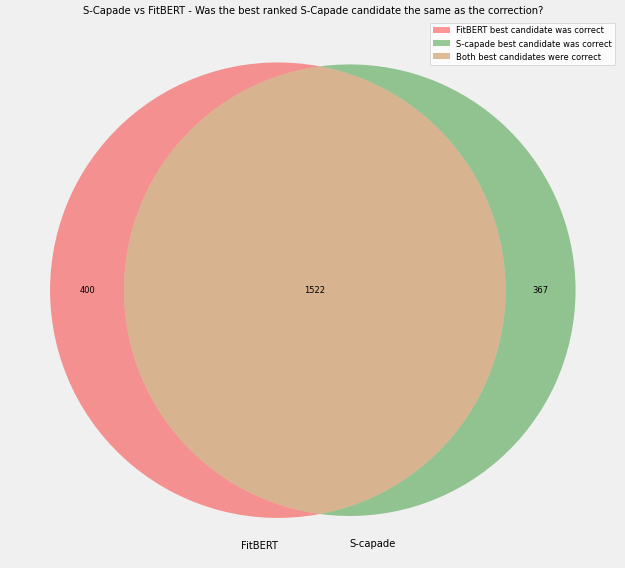

Total number of items in dataset: 3567

Number of items where S-Capade's top ranked candidate was correct: 1889
Percentage of items where S-Capade's top ranked candidate was correct: 0.5295766750770956

Number of items where FitBERT's top ranked candidate was correct (using only S-Capade candidates): 1922
Percentage of items where FitBERT's top ranked candidate was correct (using only S-Capade candidates): 0.5388281469021586



In [55]:
scapade_results_df = pd.DataFrame()

scapade_results_df["BERT_option_correct"] = (df["Correction"] == df["S-Capade Ranked"].apply(get_first_in_list))
scapade_results_df["SCapade_option_correct"] = (df["Correction"] == df["S-Capade Candidates"].apply(get_first_in_list))

sets = generate_sets_from_bools(scapade_results_df)

set_labels=['FitBERT','S-capade']

labels=['FitBERT best candidate was correct',
        'S-capade best candidate was correct',
        'Both best candidates were correct']

title = 'S-Capade vs FitBERT - Was the best ranked S-Capade candidate the same as the correction?'

plot_venn_diagram(sets, set_labels=set_labels, labels=labels, title=title)

print(f"Total number of items in dataset: {len(scapade_results_df)}")
print()

print(f"Number of items where S-Capade's top ranked candidate was correct: {scapade_results_df['SCapade_option_correct'].sum()}")
print(f"Percentage of items where S-Capade's top ranked candidate was correct: {scapade_results_df['SCapade_option_correct'].sum() / len(scapade_results_df)}")
print()

print(f"Number of items where FitBERT's top ranked candidate was correct (using only S-Capade candidates): {scapade_results_df['BERT_option_correct'].sum()}")
print(f"Percentage of items where FitBERT's top ranked candidate was correct (using only S-Capade candidates): {scapade_results_df['BERT_option_correct'].sum() / len(scapade_results_df)}")
print()


## PySpell Only

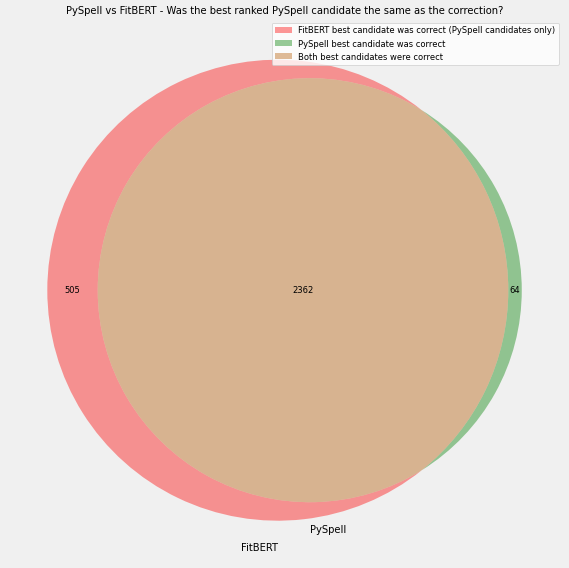

Total number of items in dataset: 3567

Number of items where PySpell's top ranked candidate was correct: 2426
Percentage of items where PySpell's top ranked candidate was correct: 0.6801233529576675

Number of items where FitBERT's top ranked candidate was correct (using only PySpell candidates): 2867
Percentage of items where FitBERT's top ranked candidate was correct (using only PySpell candidates): 0.8037566582562378



In [56]:
pyspell_results_df = pd.DataFrame()

pyspell_results_df["BERT_option_correct"] = (df["Correction"] == df["PySpell Ranked"].apply(get_first_in_list))
pyspell_results_df["PySpell_option_correct"] = (df["Correction"] == df["PySpell Candidates"].apply(get_first_in_list))

sets = generate_sets_from_bools(pyspell_results_df)

set_labels=['FitBERT','PySpell']

labels=['FitBERT best candidate was correct (PySpell candidates only)',
        'PySpell best candidate was correct',
        'Both best candidates were correct']

title = 'PySpell vs FitBERT - Was the best ranked PySpell candidate the same as the correction?'

plot_venn_diagram(sets, set_labels=set_labels, labels=labels, title=title)



print(f"Total number of items in dataset: {len(scapade_results_df)}")
print()

print(f"Number of items where PySpell's top ranked candidate was correct: {pyspell_results_df['PySpell_option_correct'].sum()}")
print(f"Percentage of items where PySpell's top ranked candidate was correct: {pyspell_results_df['PySpell_option_correct'].sum() / len(pyspell_results_df)}")
print()

print(f"Number of items where FitBERT's top ranked candidate was correct (using only PySpell candidates): {pyspell_results_df['BERT_option_correct'].sum()}")
print(f"Percentage of items where FitBERT's top ranked candidate was correct (using only PySpell candidates): {pyspell_results_df['BERT_option_correct'].sum() / len(pyspell_results_df)}")
print()


##  Combined Candidates

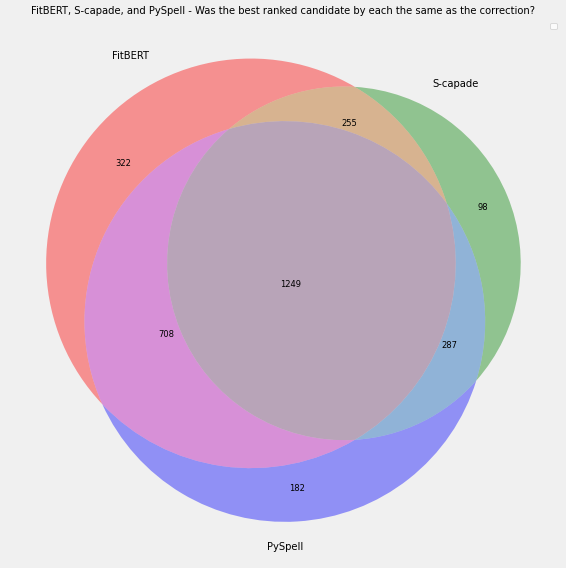

Total number of items in dataset: 3567

Number of items where FitBERT's top ranked candidate was correct (using combined candidates): 2534
Percentage of items where FitBERT's top ranked candidate was correct (using combined candidates): 0.7104008971124194



In [57]:
combined_results_df = pd.DataFrame()

combined_results_df["BERT_option_correct"] = (df["Correction"] == df["Combined Ranked"].apply(get_first_in_list))
combined_results_df["SCapade_option_correct"] = df["Correction"] == df["S-Capade Candidates"].apply(get_first_in_list)
combined_results_df["PySpell_option_correct"] = df["Correction"] == df["PySpell Candidates"].apply(get_first_in_list)

sets = generate_sets_from_bools(combined_results_df)


set_labels=['FitBERT','S-capade', 'PySpell']


title = 'FitBERT, S-capade, and PySpell - Was the best ranked candidate by each the same as the correction?'


plot_venn_diagram(sets, set_labels=set_labels, title=title)


print(f"Total number of items in dataset: {len(scapade_results_df)}")
print()

print(f"Number of items where FitBERT's top ranked candidate was correct (using combined candidates): {combined_results_df['BERT_option_correct'].sum()}")
print(f"Percentage of items where FitBERT's top ranked candidate was correct (using combined candidates): {combined_results_df['BERT_option_correct'].sum() / len(combined_results_df)}")
print()

